Setup

In [145]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, confusion_matrix, RocCurveDisplay, roc_curve, auc
from matplotlib import pyplot as plt
import seaborn as sns

titanicdf = pd.read_csv("../../data/train_v1_fe.csv", index_col=0)
titanicdf.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked', 'AgeClass', 'is_middleaged', 'is_old',
       'is_Male', 'is_Pclass_2', 'is_Pclass_3', 'emb_q', 'emb_s',
       'has_relatives', 'scld_Age', 'scld_Fare'],
      dtype='object')

In [146]:
y = titanicdf["Survived"]
X = titanicdf[['is_Male', 'is_Pclass_2', 'is_Pclass_3', 'emb_q', 'emb_s', 'has_relatives', 'scld_Age', 'scld_Fare']]

In [147]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)#, random_state=42)

In [148]:
m_rf = RandomForestClassifier(max_depth=5, n_estimators=500, class_weight="balanced")

In [149]:
m_rf.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=5, n_estimators=500)

Visualization of model predictions /w probabilities

In [150]:
y_train_pred = m_rf.predict(X_train)
y_train_pred_prob = m_rf.predict_proba(X_train)

eval_tdata = pd.DataFrame()
eval_tdata['Survived?'] = y_train
eval_tdata['prediction'] = y_train_pred
eval_tdata['prob for surv'] = m_rf.predict_proba(X_train)[:,1]
eval_tdata['prob for drow'] = m_rf.predict_proba(X_train)[:,0]
eval_tdata.sample(10)

,Survived?,prediction,prob for surv,prob for drow
PassengerId,,,,
131,0,0,0.223655,0.776345
284,1,0,0.173702,0.826298
327,0,0,0.155394,0.844606
41,0,0,0.402858,0.597142
101,0,0,0.469800,0.530200
601,1,1,0.885183,0.114817
792,0,0,0.305376,0.694624
78,0,0,0.178979,0.821021
332,0,0,0.452602,0.547398


Accuracy Score

In [151]:
trn_scr = m_rf.score(X_train, y_train)
tst_scr = m_rf.score(X_test, y_test)
print(f"{round(trn_scr,3)*100:0.1f}% of survival-statuses were predicted correctly for train data")
print(f"{round(tst_scr,3)*100:0.1f}% of survival-statuses were predicted correctly for test data")

86.5% of survival-statuses were predicted correctly for train data
82.1% of survival-statuses were predicted correctly for test data


Precision-, Recall- and F1-Score

In [152]:
ps = precision_score(y_train, y_train_pred)
rs = recall_score(y_train, y_train_pred)
fs = f1_score(y_train, y_train_pred)

In [153]:
print(f"Precision score = {round(ps*100,1)}%")
print(f"Recall score = {round(rs*100,1)}%")
print(f"F1 score = {round(fs*100,1)}%")

Precision score = 82.5%
Recall score = 80.0%
F1 score = 81.2%


Confusion Matrix

In [154]:
cm = confusion_matrix(y_train, y_train_pred)

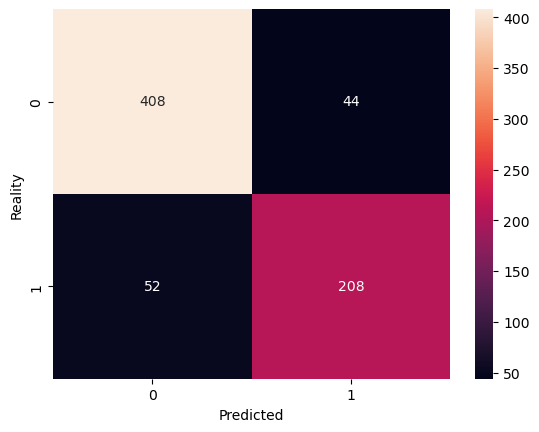

In [155]:
sns.heatmap(cm,
            annot=True,
            fmt = 'g'
            )
plt.xlabel('Predicted')
plt.ylabel('Reality')
plt.show()

ROCurve

In [156]:
fpr, tpr, thresholds = roc_curve(y_train, y_train_pred_prob[:,1])
roc_auc = auc(fpr, tpr)

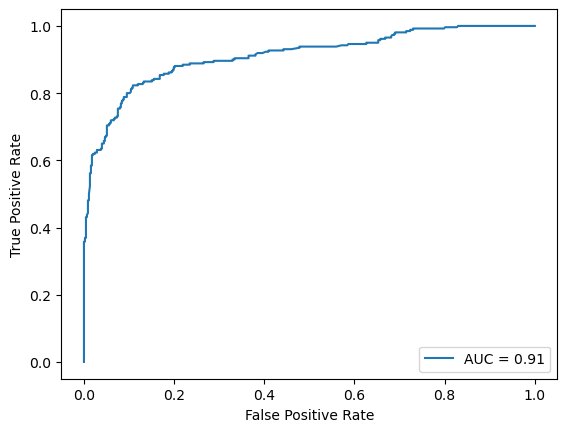

In [157]:
dp = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc)
dp.plot()
plt.show()

Find optimal threshold

In [158]:
roc_params = pd.DataFrame()

roc_params["tpr"] = tpr
roc_params["fpr"] = fpr
roc_params["thresholds"] = thresholds

roc_params

,tpr,fpr,thresholds
0,0.000000,0.000000,1.961372
1,0.003846,0.000000,0.961372
2,0.111538,0.000000,0.934209
3,0.119231,0.000000,0.931618
4,0.273077,0.000000,0.883853
...,...,...,...
210,1.000000,0.964602,0.159650
211,1.000000,0.969027,0.159030
212,1.000000,0.975664,0.158089
213,1.000000,0.984513,0.157403


In [159]:
opti = np.argmax(tpr-fpr)

print(f"Optimal True-Positive-Rate: {tpr[opti]}")
print(f"Optimal False-Positive-Rate: {fpr[opti]}")
print(f"Optimal Threshold: {thresholds[opti]}")

Optimal True-Positive-Rate: 0.823076923076923
Optimal False-Positive-Rate: 0.1084070796460177
Optimal Threshold: 0.4945313131171516


Feature Importance

In [160]:
feature_label = pd.DataFrame(X_train).columns
feature_importance = m_rf.feature_importances_

fi_df = pd.DataFrame()

fi_df["Feature Label"] = feature_label
fi_df["Feature Importance"] = feature_importance
fi_df.set_index("Feature Label", inplace=True)

fi_df.sort_values("Feature Importance", ascending=False)

,Feature Importance
Feature Label,
is_Male,0.410324
scld_Fare,0.223966
is_Pclass_3,0.135882
scld_Age,0.126588
emb_s,0.039725
has_relatives,0.026851
is_Pclass_2,0.023623
emb_q,0.013042


In [176]:
titanic_test_df = pd.read_csv("../../data/test_fe.csv", index_col=0)
titanic_test_df = titanic_test_df[['is_Male', 'is_Pclass_2', 'is_Pclass_3', 'emb_q', 'emb_s', 'has_relatives', 'scld_Age', 'scld_Fare']]

In [177]:
titanic_test_df.fillna(titanic_test_df["scld_Fare"].mean(), inplace=True)

In [178]:
export = pd.DataFrame()
export["PassengerId"] = titanic_test_df.index
export["Survived"] = m_rf.predict(titanic_test_df)

export.head(10)
export.to_csv("../../data/titanic_pred.csv", index=False)